<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('/content/homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


#Building batch_gradient_descent from scratch and then stochastic gradient descent

I hate that my data is not scaled , lets start with that first.

In [ ]:
X = df.drop('price', axis = 1)
X

,area,bedrooms,age
0,2600,3,20
1,3000,4,15
2,3200,3,18
3,3600,3,30
4,4000,5,8
5,4100,6,8


In [ ]:
df.shape

(6, 4)

In [ ]:
df.isna().any()

,0
area,False
bedrooms,False
age,False
price,False


In [ ]:
scaler_x = MinMaxScaler()
scaled_X = scaler_x.fit_transform(X)
scaled_X

array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [ ]:
df.price

,price
0,550000
1,565000
2,610000
3,595000
4,760000
5,810000


In [ ]:
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(df[['price']])
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [ ]:
#testing before inserting into the function
w = np.ones(shape=(X.shape[1]))
w

array([1., 1., 1.])

In [ ]:
#testing before inserting into the function

n = X.shape[0]
n

6

In [ ]:
#testing before inserting into the function
scaled_X.shape

(6, 3)

In [ ]:
#testing before inserting into the function
np.dot(w,scaled_X.T).shape

(6,)

In [ ]:
#testing before inserting into the function
scaled_y.flatten().shape

(6,)

now lets do the batch_gradient_descent

In [ ]:
X.shape

(6, 3)

In [ ]:
def batch_gradient_descent(X,y, epochs):
  rate = 0.01
  w = np.ones(shape=(X.shape[1]))
  bias  = 0
  n = X.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w,X.T) + bias
    loss = np.mean(np.square(y-y_predicted))
    dw = -(2/n) * np.dot((y-y_predicted),X)
    bias_d = -(2/n) * np.sum(y-y_predicted)

    w = w - (rate * dw)
    bias = bias - (rate * bias_d)

    if i%10 == 0:
      cost_list.append(loss)
      epoch_list.append(i)
  return w, bias , loss , cost_list, epoch_list


In [ ]:
w, bias, loss, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.flatten(), 50000)
w, bias , loss

(array([ 0.69039832,  0.15123816, -0.35591092]),
 0.08941953682671619,
 0.006834725524014647)

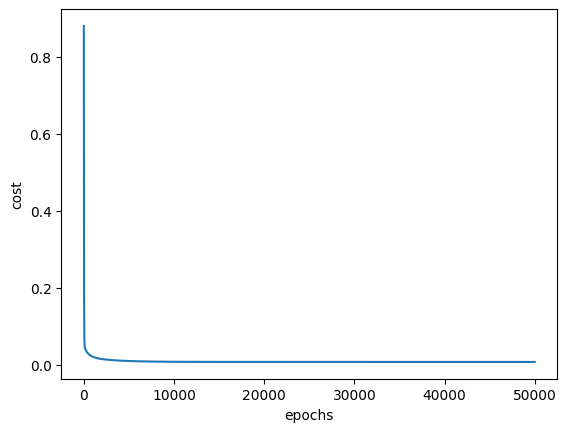

In [ ]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

#Great! we did it!!

In [ ]:
#testing my code before putting in the function
w

array([ 0.69039832,  0.15123816, -0.35591092])

In [ ]:
df.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [ ]:
#testing my code berfore I put it into the function
scaler_x.transform([[2600,3,20]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.        , 0.        , 0.54545455])

In [ ]:
#lets build the predict function

def predict(area, bedrooms, age, w, bias):
  b = scaler_x.transform([[area,bedrooms,age]])[0]
  scaled_price = (w[0]*b[0]) + (w[1]*b[1]) +  (w[2]*b[2]) + bias
  price = scaler_y.inverse_transform([[scaled_price]])
  return price


predict(3200, 3, 18, w, bias)[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


602988.3046708126

#Now its time for stochastic gradient descent

In [ ]:
#testing my code before I put it into the function

import random
random_index = random.randint(0,10)
random_index

9

In [ ]:
def stochastic_gradient_descent(X,y, epochs):
  rate = 0.01
  w = np.ones(shape=(X.shape[1]))
  bias  = 0
  n = X.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0,n-1)
    X_sample = X[random_index]
    y_sample = y[random_index]
    y_predicted = np.dot(w,X_sample.T) + bias
    loss = np.square(y_sample-y_predicted)
    dw = -(2/n) * np.dot((y_sample-y_predicted),X)
    bias_d = -(2/n) * (y_sample-y_predicted)

    w = w - (rate * dw)
    bias = bias - (rate * bias_d)

    if i%10 == 0:
      cost_list.append(loss)
      epoch_list.append(i)
  return w, bias , loss , cost_list, epoch_list

In [ ]:
w, bias, loss, cost_list, epoch_list = stochastic_gradient_descent(scaled_X,scaled_y.flatten(), 50000)
w, bias , loss

(array([[0.34815909, 0.60116226, 0.53439163],
        [0.34739421, 0.60020616, 0.53504352],
        [0.34701178, 0.60116226, 0.53465239],
        [0.3462469 , 0.60116226, 0.53308786],
        [0.34548202, 0.59925006, 0.53595616],
        [0.3452908 , 0.59829397, 0.53595616]]),
 array([-0.20387514, -0.20336808, -0.20334701, -0.20234997, -0.20233288,
        -0.20189639]),
 array([0.00281592, 0.0027632 , 0.00279597, 0.0027981 , 0.0026914 ,
        0.00265405]))

didn't get it right on the 14th October, but got it right on the 15th

#Training my fingers to fight by practicing 15th October, 2024

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler
import random

In [286]:
df = pd.read_csv('/content/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [287]:
#It is wise to scale my data.
sx = MinMaxScaler()
sy = MinMaxScaler()


In [288]:
#testing my code to see how it performs
X= df.drop('price', axis = 1)
X.head()

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2


In [289]:
type(X)

pandas.core.frame.DataFrame

In [290]:
#testing my code to see how it performs
y = df[['price']]
y.head()

,price
0,39.07
1,120.00
2,62.00
3,75.00
4,51.00


In [291]:
type(y)

pandas.core.frame.DataFrame

In [292]:
scaled_X = sx.fit_transform(X)
scaled_y = sy.fit_transform(y)

In [293]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [294]:
#testing my code to see how it performs
X.shape

(20, 2)

In [295]:
#testing my code to see how it performs
w = np.ones(shape=(X.shape[1]))
w

array([1., 1.])

In [296]:
random_index = random.randint(0, 6)
random_index

3

In [297]:
#testing my code to see how it performs

r = scaled_X[random_index]

In [298]:
r.shape

(2,)

In [299]:
w.shape

(2,)

In [300]:
#testing my code to see how it performs
(np.dot(w,r.T)).shape

()

In [301]:
#testing my code to see how it performs
scaled_X[random_index].shape

(2,)

In [302]:
#testing my code to see how it performs in the fucntion
(scaled_y[random_index]).shape

(1,)

In [303]:
def stochastic_gradient_descent(X, y, epochs):
  rate = 0.01
  bias = 0
  w = np.ones(shape=(X.shape[1]))
  n = X.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, n-1)
    sample_X = X[random_index]
    sample_y = y[random_index]

    y_predicted = np.dot(w,sample_X.T) + bias
    loss = np.square(sample_y-y_predicted)
    wd= -(2/n) * np.dot((sample_y-y_predicted),sample_X.T)
    bias_d = -(2/n) * (sample_y - y_predicted)

    w = w - (rate * wd)
    bias = bias - (rate * bias_d)

    if i%100 == 0 :
      cost_list.append(loss)
      epoch_list.append(i)


  return w, bias , loss , cost_list, epoch_list





In [304]:
w, bias , loss , cost_list, epoch_list = stochastic_gradient_descent(scaled_X, scaled_y.flatten(), 10000)
w, bias , loss

(array([0.70025751, 0.66970985]), -0.22689839340865425, 0.0025079128325042254)

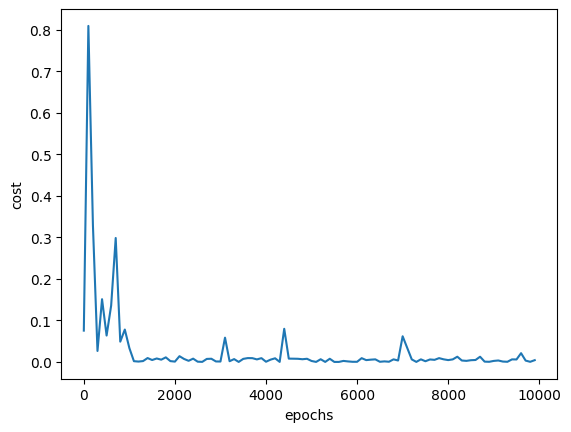

In [305]:
#before I check if this is accurate , I need see the graph of how cost performs against epoochs
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)


In [306]:
df.columns

Index(['area', 'bedrooms', 'price'], dtype='object')

In [307]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [310]:
#testing my code to see how it performs in the function
sx.transform([[1056,2]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.08827586, 0.25      ])

In [320]:
#now lets build a predict function
def predict(area, bedrooms, w, bias):
  t= sx.transform([[area, bedrooms]])[0]

  scaled_price = (w[0]*t[0]) + (w[1]*t[1] + bias)
  price = sy.inverse_transform([[scaled_price]])
  return price

In [321]:
predict(2600, 4, w, bias)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[127.85358898]])